## The Metropolis Algorithm

### Code 9.1

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import binom

In [2]:
num_islands = 10
num_weeks = 10000
positions = np.zeros(num_weeks)
current = num_islands - 1

for i in range(num_weeks):
    positions[i] = current 
    # computations modulo 10 so that the if-statments in text can be avoided
    proposal = (current + np.random.choice([-1, 1])) % num_islands 
    
    # assume that the population in island i is proportional to i + 1 
    prob_move = min((proposal + 1) / (current + 1), 1.0)
    
    coin_toss = binom.rvs(n=1, p=prob_move)
    current = proposal if coin_toss == 1 else current

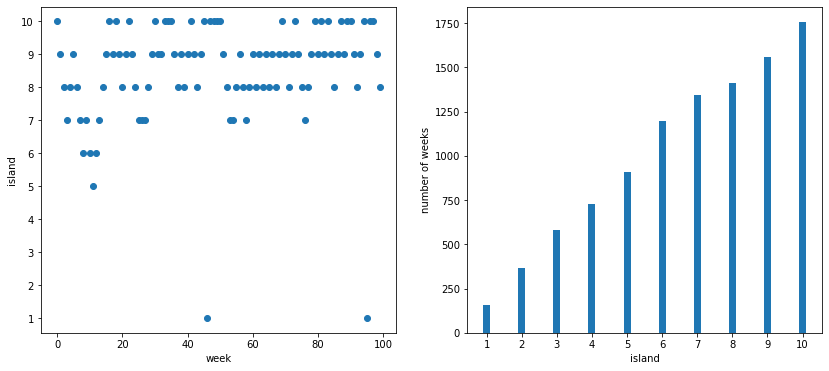

In [3]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

ax1.scatter(range(100), positions[:100])
ax1.set_xlabel('week')
ax1.set_ylabel('island')
ax1.set_yticks(range(10))
ax1.set_yticklabels(range(1, 11))

counts, _ = np.histogram(positions, bins=num_islands)
ax2.bar(range(10), height=counts, width=0.2)

ax2.set_ylabel("number of weeks")
ax2.set_xlabel("island")

ax2.set_xticks(range(10))
ax2.set_xticklabels(range(1, 11))

plt.show()